オゾンが高い日が一年を通してばらつきがあるので、評価関数がBalancedAccuracyらしい
だがlightGBMのmetricやsklearnのLogisticのパラメータではBalancedAccuracyを選択できないので、以下の対策を取る必要がある

1. OZONEは日付で周期性がある　→　3年間でオゾンが高くならない月はカットしちゃう(0と確定しちゃう)
2. OZONE=1を水増しする(他の変数は同じものを複製orわずかにパラメータを乱数で動かす)
3. フルスクラッチ

## 1. データをカット

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime
import seaborn as sns

import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/ozon_4_.ipynb
../data/sample_submit.csv
../data/submission_ensemble.csv
../data/submission_lightBGM.csv
../data/submission_lightBGM2.csv
../data/submission_lightBGM2_2.csv
../data/submission_lightBGM3.csv
../data/submission_Logistic.csv
../data/submission_Logistic2.csv
../data/submission_Logistic3.csv
../data/test.tsv
../data/train.tsv
../data/.ipynb_checkpoints\ozon_4_-checkpoint.ipynb
../data/.ipynb_checkpoints\sample_submit-checkpoint.csv
../data/.ipynb_checkpoints\submission_ensemble-checkpoint.csv
../data/.ipynb_checkpoints\submission_lightBGM-checkpoint.csv
../data/.ipynb_checkpoints\submission_lightBGM3-checkpoint.csv
../data/.ipynb_checkpoints\submission_Logistic-checkpoint.csv
../data/.ipynb_checkpoints\submission_Logistic2-checkpoint.csv
../data/.ipynb_checkpoints\submission_Logistic3-checkpoint.csv
../data/.ipynb_checkpoints\test-checkpoint.tsv
../data/.ipynb_checkpoints\train-checkpoint.tsv


In [2]:
train_df = pd.read_table('../data/train.tsv', index_col='Date', parse_dates=True)
test_df = pd.read_table('../data/test.tsv', index_col='Date', parse_dates=True)
sample_sub = pd.read_csv('../data/sample_submit.csv')

# set type label
train_df['type'] = 'train'
test_df['type'] = 'test'

# all data
all_df = pd.concat([train_df, test_df], axis=0)

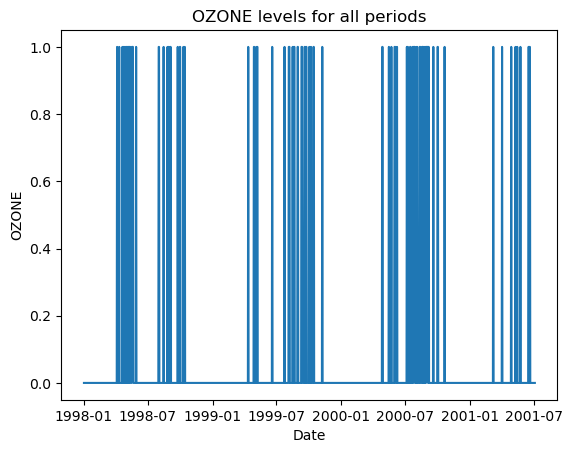

In [3]:
# 日ごとのオゾンレベル(全期間)
plt.title("OZONE levels for all periods")
plt.xlabel("Date")
plt.ylabel("OZONE")
plt.plot(train_df["OZONE"])
plt.show()

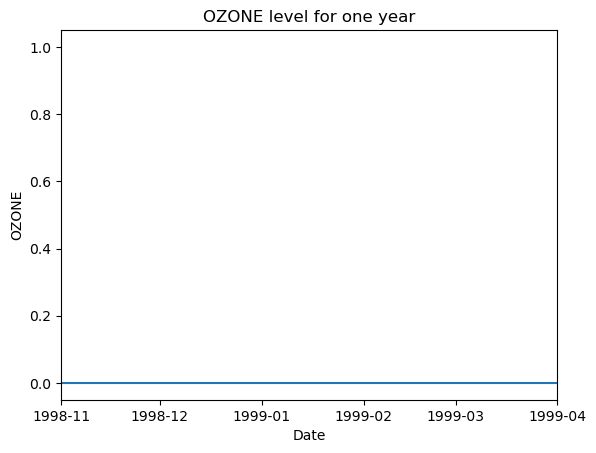

In [4]:
# 日ごとのオゾンレベル(半年間)
plt.title("OZONE level for one year")
plt.xlabel("Date")
plt.ylabel("OZONE")
#x軸の上限・下限
sxmin='1998-11-01'
sxmax='1999-04-01'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin, xmax])
plt.plot(train_df["OZONE"])
plt.show()

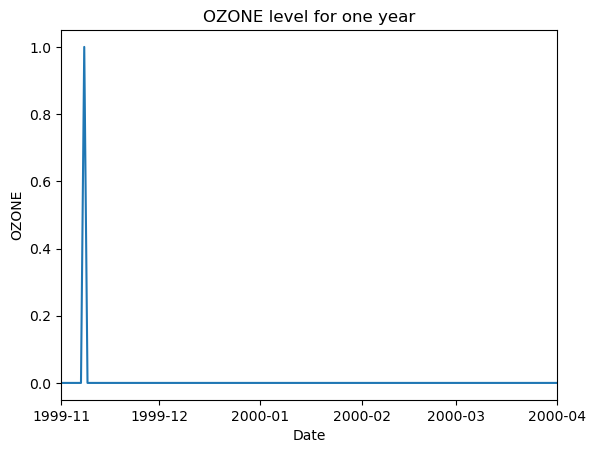

In [5]:
# 日ごとのオゾンレベル(半年間)
plt.title("OZONE level for one year")
plt.xlabel("Date")
plt.ylabel("OZONE")
#x軸の上限・下限
sxmin='1999-11-01'
sxmax='2000-04-01'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin, xmax])
plt.plot(train_df["OZONE"])
plt.show()

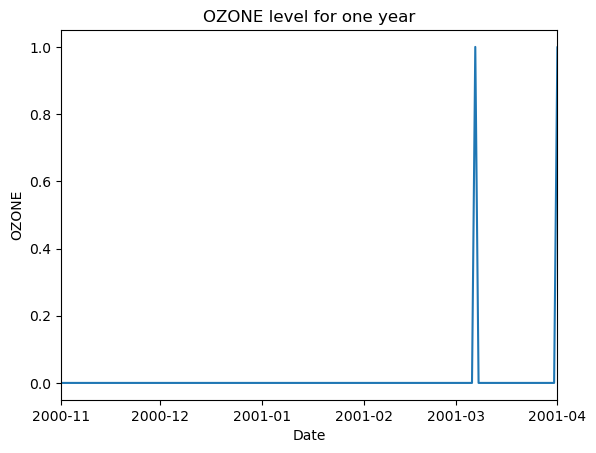

In [6]:
# 日ごとのオゾンレベル(半年間)
plt.title("OZONE level for one year")
plt.xlabel("Date")
plt.ylabel("OZONE")
#x軸の上限・下限
sxmin='2000-11-01'
sxmax='2001-04-01'
xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
plt.xlim([xmin, xmax])
plt.plot(train_df["OZONE"])
plt.show()

→　12/1~3/1はOZONE=0と確定しちゃう

In [7]:
train_df = all_df[all_df['type'] == 'train']
print("train OZONE==1 :" + str(len(train_df[train_df['OZONE'] == 1])))
print("train OZONE==0 :" + str(len(train_df[train_df['OZONE'] == 0])))
print("test           :" + str(len(all_df[all_df['type'] == 'test'])))

# データの削除, SLP_
all_df = all_df[(all_df.index.month != 12)]
all_df = all_df[(all_df.index.month != 1)]
all_df = all_df[(all_df.index.month != 2)]

train_df = all_df[all_df['type'] == 'train']
print("↓")
print("train OZONE==1 :" + str(len(train_df[train_df['OZONE'] == 1])))
print("train OZONE==0 :" + str(len(train_df[train_df['OZONE'] == 0])))
print("test           :" + str(len(all_df[all_df['type'] == 'test'])))

train OZONE==1 :111
train OZONE==0 :1156
test           :1267
↓
train OZONE==1 :111
train OZONE==0 :827
test           :965


In [8]:
# 改めてピアソン相関
corr_matrix = train_df.corr()
y_corr = corr_matrix[y]
# 横棒グラフ
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.barplot(x=y_corr, y=y_corr.index, ax=ax) 
#X,Y軸とグラフタイトル 
ax.set_xlabel("Correlation Coefficient") 
ax.set_ylabel("Features") 
ax.set_title(f"Correlation with {y}") 
#表示 
plt.show()

ValueError: could not convert string to float: 'train'